# Lab 5 - Linear Regression

Welcome to this week's lab on Linear Regression! This week, we will train our first machine learning model using linear regression! We will explore and implement a simple linear regression model using `scikit-learn` to predict a dependent variable based on an independent variable.

## Part 1: Linear Regression Walkthrough
We will use a synthetic dataset generated for the purpose of this exercise, representing the relationship between hours studied (independent variable) and exam scores (dependent variable).

### Step 1: Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

### Step 2: Generate Dataset

In [3]:
# Generate synthetic data: hours studied vs exam score
np.random.seed(0)  # For reproducibility
hours_studied = np.random.rand(100, 1) * 10  # Random values in a 10-hour range
exam_scores = 2 * hours_studied + np.random.randn(100, 1) * 2  # Linear relationship with noise

# Convert to a DataFrame for easier handling
data = pd.DataFrame({'Hours Studied': hours_studied.flatten(), 'Exam Score': exam_scores.flatten()})
data

,Hours Studied,Exam Score
0,5.488135,8.645970
1,7.151894,16.105440
2,6.027634,12.986592
3,5.448832,7.825176
4,4.236548,11.449600
...,...,...
95,1.831914,5.027016
96,5.865129,10.123439
97,0.201075,-0.976949
98,8.289400,15.667736


### Step 3: Visualize Data

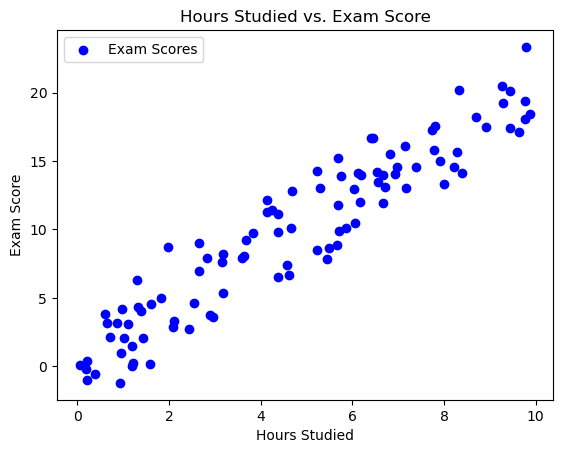

In [4]:
plt.scatter(data['Hours Studied'], data['Exam Score'], color='blue', label='Exam Scores')
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

What do you infer from the visualized data?

We can briefly infer from the visualized data that there is a positive correlation between the hours studied and the exam scores. They seem to be directly proportionate as we see a growing linear distribution.

### Step 4: Prepare Data

In [5]:
# Split the dataset
X = data[['Hours Studied']]
y = data['Exam Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Why do we split data? How do you decide the portions for train and test sets?

The reason we split the data is to later assess the performance of the model on unseen data. We should evaluate the model on its performance regarding new data it has never seen before.
Usually, the portions for training and testing are divided with a random split. The ratios differ, but the training set is usually larger to allow the model to learn more from the data. The training set could contain 70-80% of the data, and the test set contains 20-30% of it. 

### Step 5: Create and Train Model

In [6]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

LinearRegression()

### Step 6: Model Evaluation

In [7]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 1.60
R-squared: 0.85


### Step 7: Make Predictions

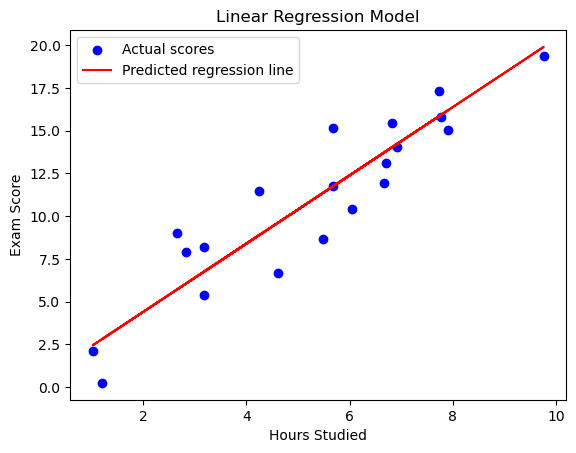

In [8]:
# Visualization of the model predictions
plt.scatter(X_test, y_test, color='blue', label='Actual scores')
plt.plot(X_test, y_pred, color='red', label='Predicted regression line')
plt.title('Linear Regression Model')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

Discuss about your findings.

- There is a positive correlation between the number of hours studied and the exam scores. This means that students who studied more hours tend to have higher exam scores.
- The predicted regression line is lower than the actual scores for most of the data points. This suggests that the model underestimates the exam scores for students who studied more hours.
- There is a wider spread of data points at the higher end of the hours studied range. This suggests that there is more variability in exam scores for students who studied more hours.

Overall, the image suggests that there is a positive relationship between the number of hours studied and exam scores, but the model is not perfect at predicting exam scores. There is also some variability in exam scores for students who studied the same amount of time.

## Part 2: Implement a Regression Model

Apply your understanding of linear regression to a new dataset to predict `y` based on `x`. Find and use any dataset of your choice to complete this task.

### Task 1: Implement the Regression Model

In [9]:
# Your code goes here
# You can break it down to several code cells

I chose the carprice.csv dataset from kaggle to predict prices of cars based on their horsepower.

In [12]:
carprice = pd.read_csv('carprice.csv')
carprice

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


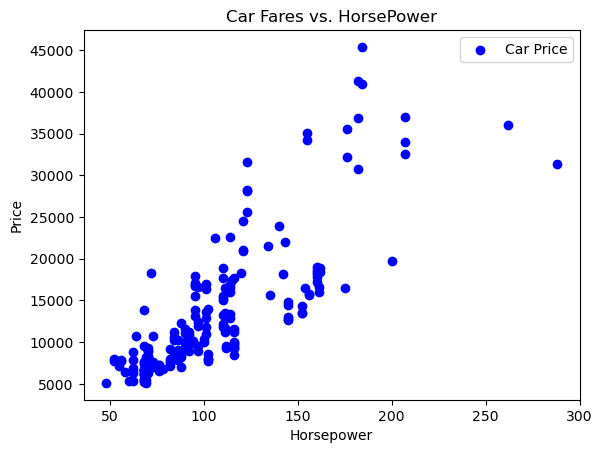

In [13]:
plt.scatter(carprice['horsepower'], carprice['price'], color = 'blue', label = 'Car Price')
plt.title('Car Fares vs. HorsePower')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
X = carprice[['horsepower']]
y = carprice[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
my_model = LinearRegression()
my_model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = my_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")
     

Mean Absolute Error: 3601.92
R-squared: 0.63


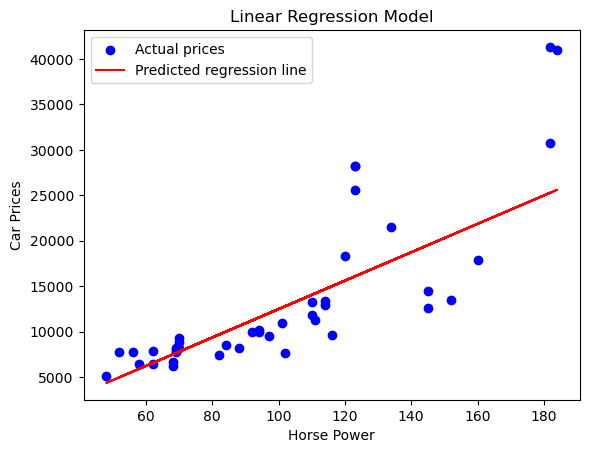

In [18]:
plt.scatter(X_test, y_test, color='blue', label='Actual prices')
plt.plot(X_test, y_pred, color='red', label='Predicted regression line')
plt.title('Linear Regression Model')
plt.xlabel('Horse Power')
plt.ylabel('Car Prices')
plt.legend()
plt.show()

### Task 2: Explain your implementation
Provide detailed explanation and discussion about your implementation. Break it down to different steps as relevant to your implementation.

# Implementation
Step 1: I started by downloading the dataset from Kaggle, putting in in my folder and reading it. 
Step 2: In this step, I visualized the data by displaying a scatter plot of horsepower vs car prices. This showed there is a positive correlation between the two.
Step 3: In this step, I split the dataset into training and testing portions using the same commands as in the first section of the lab.
Step 4: I created a new model and trained on the training data that we assigned in the previous step.
Step 5: In this step, I evaluated the model by calculating the Mean Absolute Error and R-squarred score. Our MAE of 3601.92 is not that bad considering our scale, and the R-squarred score of 0.63 is also okay, it is not a perfect fit still. 
Step 6: This last step is to make predictions and compare them with the actual values. The model was able to catch the positive correlation, but it was off for a few values considering the horse power and car price do have a correlation, but other variables come into play to determine the price of a car such as brand, etc.

# Interpretation
We can see that the line graph which depicts a positive correlation between horsepower and car prices. This means that as the horsepower of a car increases, its price also tends to increase.

This can be cause by the fact that Cars with more horsepower tend to be faster and more powerful, which are desirable qualities for many car buyers. As a result, car manufacturers may charge more for cars with higher horsepower engines.

It's important to note that the correlation between horsepower and price is not perfect. There are other factors that can affect the price of a car, such as its brand, fuel efficiency, safety features, and overall condition. However, the positive correlation between horsepower and price is generally true across the car market.




## Submission
Submit a link to your completed Jupyter Notebook file hosted on your private GitHub repository through the submission link in Blackboard.